In [1]:
from array import array
import itertools
import time
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
from matplotlib.ticker import NullFormatter

from scipy.optimize import curve_fit

#This line is important. On this server I don't know if we have the ability to output plots. This is a solution.

%matplotlib inline

#Importing root_pandas and root_numpy.

import sys
sys.path.insert(0,'/usr/common/software/rootpy/')
import root_numpy
import root_pandas as rpd
import ROOT
from root_pandas import read_root

Welcome to ROOTaaS 6.06/06


In [2]:
def getWeights(filename,dataframe):
    
    if('Skimmed_17g6a1_pthat1' in filename):
        dataframe.eval('weights = 1.60*10**(-11)',inplace=True)
    elif('Skimmed_17g6a1_pthat2' in filename):
        dataframe.eval('weights = 2.72*10**(-12)',inplace=True)
    elif('Skimmed_17g6a1_pthat3' in filename):
        dataframe.eval('weights = 3.69*10**(-13)',inplace=True)
    elif('Skimmed_17g6a1_pthat4' in filename):
        dataframe.eval('weights = 6.14*10**(-14)',inplace=True)
    elif('Skimmed_17g6a1_pthat5' in filename):
        dataframe.eval('weights = 1.27*10**(-14)',inplace=True)
    
    elif('Skimmed_17g6a3_pthat1' in filename):
        dataframe.eval('weights = 4.47*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat2' in filename):
        dataframe.eval('weights = 9.83*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat3' in filename):
        dataframe.eval('weights = 1.04*10**(-10)',inplace=True)
    elif('Skimmed_17g6a3_pthat4' in filename):
        dataframe.eval('weights = 1.01*10**(-10)',inplace=True)
    elif('Skimmed_17g6a3_pthat5' in filename):
        dataframe.eval('weights = 6.93*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat6' in filename):
        dataframe.eval('weights = 5.13*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat7' in filename):
        dataframe.eval('weights = 3.03*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat8' in filename):
        dataframe.eval('weights = 1.89*10**(-11)',inplace=True)
    
    else:
        dataframe.eval('weights = eg_cross_section/eg_ntrial',inplace=True)
        
    return dataframe

In [3]:
def getCluster04(inputFiles):
    
    scalarColumns = []
    scalarColumns.append('eg_cross_section')
    scalarColumns.append('eg_ntrial')
    scalarColumns.append('ue_estimate_its_const')

    arrayColumns = []
    arrayColumns.append('cluster_pt')
    arrayColumns.append('cluster_eta')
    arrayColumns.append('cluster_ncell')
    arrayColumns.append('cluster_e_cross')
    arrayColumns.append('cluster_e')
    arrayColumns.append('cluster_e_max')
    arrayColumns.append('cluster_tof')
    arrayColumns.append('cluster_nlocal_maxima')
    arrayColumns.append('cluster_distance_to_bad_channel')
    arrayColumns.append('cluster_iso_its_04')
    arrayColumns.append('cluster_iso_its_04_ue')
    arrayColumns.append('cluster_iso_04_truth')
    arrayColumns.append('cluster_NN1')
    arrayColumns.append('cluster_Lambda')
    
    arrayColumns.append('cluster_Lambda_angle')

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile, columns=columns, flatten=arrayColumns)
        end = time.time()
        getWeights(filename,dataframe)
        print 'Processed {0} in {1} seconds'.format(filename, end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [4]:
pPbFiles       = ['Skimmed_13def_ptmin12.0_Nevent_1416399.root']
pPbHist_04     = getCluster04(pPbFiles)

mc_18g7a_files = ['Skimmed_17g6a3_pthat1_ptmin12.0_Nevent_1143901.root','Skimmed_17g6a3_pthat2_ptmin12.0_Nevent_1992307.root','Skimmed_17g6a3_pthat3_ptmin12.0_Nevent_4123564.root',
                  'Skimmed_17g6a3_pthat4_ptmin12.0_Nevent_2234506.root','Skimmed_17g6a3_pthat5_ptmin12.0_Nevent_1903308.root','Skimmed_17g6a3_pthat6_ptmin12.0_Nevent_1875403.root',
                  'Skimmed_17g6a3_pthat7_ptmin12.0_Nevent_1734300.root','Skimmed_17g6a3_pthat8_ptmin12.0_Nevent_1733709.root']
mc_18g7a_04    = getCluster04(mc_18g7a_files)

Processed Skimmed_13def_ptmin12.0_Nevent_1416399.root in 52.1692609787 seconds
Processed Skimmed_17g6a3_pthat1_ptmin12.0_Nevent_1143901.root in 2.79727697372 seconds
Processed Skimmed_17g6a3_pthat2_ptmin12.0_Nevent_1992307.root in 9.7099070549 seconds
Processed Skimmed_17g6a3_pthat3_ptmin12.0_Nevent_4123564.root in 37.2406020164 seconds
Processed Skimmed_17g6a3_pthat4_ptmin12.0_Nevent_2234506.root in 32.2035319805 seconds
Processed Skimmed_17g6a3_pthat5_ptmin12.0_Nevent_1903308.root in 45.1102778912 seconds
Processed Skimmed_17g6a3_pthat6_ptmin12.0_Nevent_1875403.root in 58.5593020916 seconds
Processed Skimmed_17g6a3_pthat7_ptmin12.0_Nevent_1734300.root in 68.2934710979 seconds
Processed Skimmed_17g6a3_pthat8_ptmin12.0_Nevent_1733709.root in 98.4137580395 seconds


In [5]:
def applyCut(inputDataframe,cut,text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [6]:
def applyCuts(fullDataframe,name='default'):  
    
    fullDataframe.eval('cluster_ecross_over_e = cluster_e_cross/cluster_e',inplace=True)
    fullDataframe.eval('cluster_emax_over_e  = cluster_e_max/cluster_e'   ,inplace=True)
    fullDataframe.eval('cluster_Lambda_Angle = 1.62*cluster_Lambda_angle' ,inplace=True)
    fullDataframe.eval('cluster_iso_its_04_sub = cluster_iso_its_04 + cluster_iso_its_04_ue - ue_estimate_its_const*0.4*0.4*3.1416',inplace=True)

    dataframe = fullDataframe
    dataframe = applyCut(dataframe,'abs(cluster_eta) < 0.67',      '|eta| < 0.67:')
    dataframe = applyCut(dataframe,'cluster_ecross_over_e > 0.03', 'ecross/e > 0.03:')
    dataframe = applyCut(dataframe,'cluster_ncell > 2',            'number of cells > 2')
    dataframe = applyCut(dataframe,'abs(cluster_tof) < 20',        '|tof| < 20:')
    dataframe = applyCut(dataframe,'cluster_nlocal_maxima < 3',    'maxima < 3:')

    return dataframe

In [7]:
print 'Skimmed_18g7a.root'
mcSignal_18g7a_Hists_04 = applyCuts(mc_18g7a_04)
print '\n'
print 'p-Pb data'
pPbHists_04 = applyCuts(pPbHist_04)

Skimmed_18g7a.root
|eta| < 0.67: 18731445  fraction kept: 100.0
ecross/e > 0.03: 13776925  fraction kept: 73.5
number of cells > 2 9242817  fraction kept: 67.1
|tof| < 20: 9128352  fraction kept: 98.8
maxima < 3: 7748819  fraction kept: 84.9


p-Pb data
|eta| < 0.67: 3432264  fraction kept: 99.9
ecross/e > 0.03: 2389594  fraction kept: 69.6
number of cells > 2 1566480  fraction kept: 65.6
|tof| < 20: 1529893  fraction kept: 97.7
maxima < 3: 1317375  fraction kept: 86.1


In [8]:
pTarray  = np.array([ '12.5', '13.5', '14.0', '16.0', '18.0', '20.0', '25.0', '30.0', '40.0'])
ISOarray = np.array([ ' 0', '1.5', '5', '15'])

In [9]:
def bins(inputDataframe, variable, array, i):
    
        i = i - 1
        
        if i == 1:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i]) +     '')
            
            return df1
        if i == 2:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2
        if i == 3:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3
        if i == 4:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4
        if i == 5:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5
        if i == 6:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6
        if i == 7:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7
        if i == 8: 
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 8]) + ' and ' + str(variable) + ' < ' + str(array[i - 7]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df8 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7, df8
        if i == 9:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 9]) + ' and ' + str(variable) + ' < ' + str(array[i - 8]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 8]) + ' and ' + str(variable) + ' < ' + str(array[i - 7]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df8 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df9 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7, df8, df9
        if i == 10:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 10])+ ' and ' + str(variable) + ' < ' + str(array[i - 9]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 9]) + ' and ' + str(variable) + ' < ' + str(array[i - 8]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 8]) + ' and ' + str(variable) + ' < ' + str(array[i - 7]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df8 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df9 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df10= inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7, df8, df9, df10
        
        else:
            print('Need more entries in your array.')

In [10]:
###pT bins###

mcSignal_18g7a_Hists_04_1,mcSignal_18g7a_Hists_04_2,mcSignal_18g7a_Hists_04_3,mcSignal_18g7a_Hists_04_4,mcSignal_18g7a_Hists_04_5,mcSignal_18g7a_Hists_04_6,mcSignal_18g7a_Hists_04_7,mcSignal_18g7a_Hists_04_8 = bins(mcSignal_18g7a_Hists_04, 'cluster_pt', pTarray, pTarray.shape[0])

pPbHists_04_1,pPbHists_04_2,pPbHists_04_3,pPbHists_04_4,pPbHists_04_5,pPbHists_04_6,pPbHists_04_7,pPbHists_04_8 = bins(pPbHists_04, 'cluster_pt', pTarray, pTarray.shape[0])

In [14]:
###ISO bins###

mcSignal_18g7a_Hists_04_1_1,mcSignal_18g7a_Hists_04_5_1,mcSignal_18g7a_Hists_04_5_15_1 = bins(mcSignal_18g7a_Hists_04_1, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
mcSignal_18g7a_Hists_04_1_2,mcSignal_18g7a_Hists_04_5_2,mcSignal_18g7a_Hists_04_5_15_2 = bins(mcSignal_18g7a_Hists_04_2, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
mcSignal_18g7a_Hists_04_1_3,mcSignal_18g7a_Hists_04_5_3,mcSignal_18g7a_Hists_04_5_15_3 = bins(mcSignal_18g7a_Hists_04_3, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
mcSignal_18g7a_Hists_04_1_4,mcSignal_18g7a_Hists_04_5_4,mcSignal_18g7a_Hists_04_5_15_4 = bins(mcSignal_18g7a_Hists_04_4, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
mcSignal_18g7a_Hists_04_1_5,mcSignal_18g7a_Hists_04_5_5,mcSignal_18g7a_Hists_04_5_15_5 = bins(mcSignal_18g7a_Hists_04_5, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
mcSignal_18g7a_Hists_04_1_6,mcSignal_18g7a_Hists_04_5_6,mcSignal_18g7a_Hists_04_5_15_6 = bins(mcSignal_18g7a_Hists_04_6, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
mcSignal_18g7a_Hists_04_1_7,mcSignal_18g7a_Hists_04_5_7,mcSignal_18g7a_Hists_04_5_15_7 = bins(mcSignal_18g7a_Hists_04_7, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
mcSignal_18g7a_Hists_04_1_8,mcSignal_18g7a_Hists_04_5_8,mcSignal_18g7a_Hists_04_5_15_8 = bins(mcSignal_18g7a_Hists_04_8, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])

pPbHists_04_1_1,pPbHists_04_5_1,pPbHists_04_5_15_1 = bins(pPbHists_04_1, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
pPbHists_04_1_2,pPbHists_04_5_2,pPbHists_04_5_15_2 = bins(pPbHists_04_2, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
pPbHists_04_1_3,pPbHists_04_5_3,pPbHists_04_5_15_3 = bins(pPbHists_04_3, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
pPbHists_04_1_4,pPbHists_04_5_4,pPbHists_04_5_15_4 = bins(pPbHists_04_4, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
pPbHists_04_1_5,pPbHists_04_5_5,pPbHists_04_5_15_5 = bins(pPbHists_04_5, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
pPbHists_04_1_6,pPbHists_04_5_6,pPbHists_04_5_15_6 = bins(pPbHists_04_6, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
pPbHists_04_1_7,pPbHists_04_5_7,pPbHists_04_5_15_7 = bins(pPbHists_04_7, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])
pPbHists_04_1_8,pPbHists_04_5_8,pPbHists_04_5_15_8 = bins(pPbHists_04_8, 'cluster_iso_its_04_sub', ISOarray, ISOarray.shape[0])

In [12]:
mcSignal_18g7a_Hists_04_1_1    = mcSignal_18g7a_Hists_04_1.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_1 = mcSignal_18g7a_Hists_04_1.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

mcSignal_18g7a_Hists_04_1_2    = mcSignal_18g7a_Hists_04_2.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_2 = mcSignal_18g7a_Hists_04_2.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

mcSignal_18g7a_Hists_04_1_3    = mcSignal_18g7a_Hists_04_3.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_3 = mcSignal_18g7a_Hists_04_3.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

mcSignal_18g7a_Hists_04_1_4    = mcSignal_18g7a_Hists_04_4.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_4 = mcSignal_18g7a_Hists_04_4.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

mcSignal_18g7a_Hists_04_1_5    = mcSignal_18g7a_Hists_04_5.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_5 = mcSignal_18g7a_Hists_04_5.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

mcSignal_18g7a_Hists_04_1_6    = mcSignal_18g7a_Hists_04_6.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_6 = mcSignal_18g7a_Hists_04_6.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

mcSignal_18g7a_Hists_04_1_7    = mcSignal_18g7a_Hists_04_7.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_7 = mcSignal_18g7a_Hists_04_7.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

mcSignal_18g7a_Hists_04_1_8    = mcSignal_18g7a_Hists_04_8.query('cluster_iso_its_04_sub < 1.5')
mcSignal_18g7a_Hists_04_5_15_8 = mcSignal_18g7a_Hists_04_8.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_1    = pPbHists_04_1.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_1 = pPbHists_04_1.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_2    = pPbHists_04_2.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_2 = pPbHists_04_2.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_3    = pPbHists_04_3.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_3 = pPbHists_04_3.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_4    = pPbHists_04_4.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_4 = pPbHists_04_4.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_5    = pPbHists_04_5.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_5 = pPbHists_04_5.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_6    = pPbHists_04_6.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_6 = pPbHists_04_6.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_7    = pPbHists_04_7.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_7 = pPbHists_04_7.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

pPbHists_04_1_8    = pPbHists_04_8.query('cluster_iso_its_04_sub < 1.5')
pPbHists_04_5_15_8 = pPbHists_04_8.query('cluster_iso_its_04_sub > 5 and cluster_iso_its_04_sub < 15')

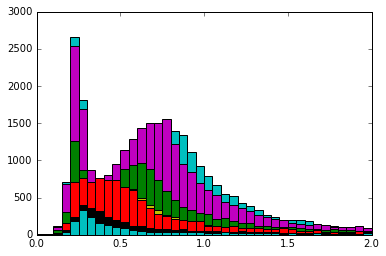

In [15]:
#####For Lambda variables#####

i_1, j_1, _ = plt.hist(mcSignal_18g7a_Hists_04_1_1["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_1['weights'])
k_1, l_1, _ = plt.hist(pPbHists_04_1_1["cluster_Lambda"],bins=40,range=(0,2))

m_1, n_1, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_1["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_1['weights'])
o_1, p_1, _ = plt.hist(pPbHists_04_5_15_1["cluster_Lambda"],bins=40,range=(0,2))

##############################

i_2, j_2, _ = plt.hist(mcSignal_18g7a_Hists_04_1_2["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_2['weights'])
k_2, l_2, _ = plt.hist(pPbHists_04_1_2["cluster_Lambda"],bins=40,range=(0,2))

m_2, n_2, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_2["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_2['weights'])
o_2, p_2, _ = plt.hist(pPbHists_04_5_15_2["cluster_Lambda"],bins=40,range=(0,2))

##############################

i_3, j_3, _ = plt.hist(mcSignal_18g7a_Hists_04_1_3["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_3['weights'])
k_3, l_3, _ = plt.hist(pPbHists_04_1_3["cluster_Lambda"],bins=40,range=(0,2))

m_3, n_3, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_3["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_3['weights'])
o_3, p_3, _ = plt.hist(pPbHists_04_5_15_3["cluster_Lambda"],bins=40,range=(0,2))

##############################

i_4, j_4, _ = plt.hist(mcSignal_18g7a_Hists_04_1_4["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_4['weights'])
k_4, l_4, _ = plt.hist(pPbHists_04_1_4["cluster_Lambda"],bins=40,range=(0,2))

m_4, n_4, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_4["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_4['weights'])
o_4, p_4, _ = plt.hist(pPbHists_04_5_15_4["cluster_Lambda"],bins=40,range=(0,2))

##############################

i_5, j_5, _ = plt.hist(mcSignal_18g7a_Hists_04_1_5["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_5['weights'])
k_5, l_5, _ = plt.hist(pPbHists_04_1_5["cluster_Lambda"],bins=40,range=(0,2))

m_5, n_5, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_5["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_5['weights'])
o_5, p_5, _ = plt.hist(pPbHists_04_5_15_5["cluster_Lambda"],bins=40,range=(0,2))

##############################

i_6, j_6, _ = plt.hist(mcSignal_18g7a_Hists_04_1_6["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_6['weights'])
k_6, l_6, _ = plt.hist(pPbHists_04_1_6["cluster_Lambda"],bins=40,range=(0,2))

m_6, n_6, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_6["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_6['weights'])
o_6, p_6, _ = plt.hist(pPbHists_04_5_15_6["cluster_Lambda"],bins=40,range=(0,2))

##############################

i_7, j_7, _ = plt.hist(mcSignal_18g7a_Hists_04_1_7["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_7['weights'])
k_7, l_7, _ = plt.hist(pPbHists_04_1_7["cluster_Lambda"],bins=40,range=(0,2))

m_7, n_7, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_7["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_7['weights'])
o_7, p_7, _ = plt.hist(pPbHists_04_5_15_7["cluster_Lambda"],bins=40,range=(0,2))

##############################

i_8, j_8, _ = plt.hist(mcSignal_18g7a_Hists_04_1_8["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_1_8['weights'])
k_8, l_8, _ = plt.hist(pPbHists_04_1_8["cluster_Lambda"],bins=40,range=(0,2))

m_8, n_8, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_8["cluster_Lambda"],bins=40,range=(0,2),weights=mcSignal_18g7a_Hists_04_5_15_8['weights'])
o_8, p_8, _ = plt.hist(pPbHists_04_5_15_8["cluster_Lambda"],bins=40,range=(0,2))

##############################

In [16]:
pPb_ratio_data_1 = np.divide(k_1,o_1)
pPb_ratio_MC_1   = np.divide(i_1,m_1)

pPb_ratio_dataToMC_1 = np.divide(pPb_ratio_data_1,pPb_ratio_MC_1)

##############################

pPb_ratio_data_2 = np.divide(k_2,o_2)
pPb_ratio_MC_2   = np.divide(i_2,m_2)

pPb_ratio_dataToMC_2 = np.divide(pPb_ratio_data_2,pPb_ratio_MC_2)

##############################

pPb_ratio_data_3 = np.divide(k_3,o_3)
pPb_ratio_MC_3   = np.divide(i_3,m_3)

pPb_ratio_dataToMC_3 = np.divide(pPb_ratio_data_3,pPb_ratio_MC_3)

##############################

pPb_ratio_data_4 = np.divide(k_4,o_4)
pPb_ratio_MC_4   = np.divide(i_4,m_4)

pPb_ratio_dataToMC_4 = np.divide(pPb_ratio_data_4,pPb_ratio_MC_4)

##############################

pPb_ratio_data_5 = np.divide(k_5,o_5)
pPb_ratio_MC_5   = np.divide(i_5,m_5)

pPb_ratio_dataToMC_5 = np.divide(pPb_ratio_data_5,pPb_ratio_MC_5)

##############################

pPb_ratio_data_6 = np.divide(k_6,o_6)
pPb_ratio_MC_6   = np.divide(i_6,m_6)

pPb_ratio_dataToMC_6 = np.divide(pPb_ratio_data_6,pPb_ratio_MC_6)

##############################

pPb_ratio_data_7 = np.divide(k_7,o_7)
pPb_ratio_MC_7   = np.divide(i_7,m_7)

pPb_ratio_dataToMC_7 = np.divide(pPb_ratio_data_7,pPb_ratio_MC_7)

##############################

pPb_ratio_data_8 = np.divide(k_8,o_8)
pPb_ratio_MC_8   = np.divide(i_8,m_8)

pPb_ratio_dataToMC_8 = np.divide(pPb_ratio_data_8,pPb_ratio_MC_8)

In [17]:
pPb_ratio_data_err_1 = np.sqrt( (np.divide(1, np.sqrt(k_1)))**2 + (np.divide(1, np.sqrt(o_1)))**2 )

pPb_ratio_dataToMC_err_1 = pPb_ratio_dataToMC_1 * pPb_ratio_data_err_1

##############################

pPb_ratio_data_err_2 = np.sqrt( (np.divide(1, np.sqrt(k_2)))**2 + (np.divide(1, np.sqrt(o_2)))**2 )

pPb_ratio_dataToMC_err_2 = pPb_ratio_dataToMC_2 * pPb_ratio_data_err_2

##############################

pPb_ratio_data_err_3 = np.sqrt( (np.divide(1, np.sqrt(k_3)))**2 + (np.divide(1, np.sqrt(o_3)))**2 )

pPb_ratio_dataToMC_err_3 = pPb_ratio_dataToMC_3 * pPb_ratio_data_err_3

##############################

pPb_ratio_data_err_4 = np.sqrt( (np.divide(1, np.sqrt(k_4)))**2 + (np.divide(1, np.sqrt(o_4)))**2 )

pPb_ratio_dataToMC_err_4 = pPb_ratio_dataToMC_4 * pPb_ratio_data_err_4

##############################

pPb_ratio_data_err_5 = np.sqrt( (np.divide(1, np.sqrt(k_5)))**2 + (np.divide(1, np.sqrt(o_5)))**2 )

pPb_ratio_dataToMC_err_5 = pPb_ratio_dataToMC_5 * pPb_ratio_data_err_5

##############################

pPb_ratio_data_err_6 = np.sqrt( (np.divide(1, np.sqrt(k_6)))**2 + (np.divide(1, np.sqrt(o_6)))**2 )

pPb_ratio_dataToMC_err_6 = pPb_ratio_dataToMC_6 * pPb_ratio_data_err_6

##############################

pPb_ratio_data_err_7 = np.sqrt( (np.divide(1, np.sqrt(k_7)))**2 + (np.divide(1, np.sqrt(o_7)))**2 )

pPb_ratio_dataToMC_err_7 = pPb_ratio_dataToMC_7 * pPb_ratio_data_err_7

##############################

pPb_ratio_data_err_8 = np.sqrt( (np.divide(1, np.sqrt(k_8)))**2 + (np.divide(1, np.sqrt(o_8)))**2 )

pPb_ratio_dataToMC_err_8 = pPb_ratio_dataToMC_8 * pPb_ratio_data_err_8

In [18]:
###Fitting###
def func(x, m, b): 
    
    return m * x + b

popt_1,pcov_1 = curve_fit(func, j_1[10:36], pPb_ratio_dataToMC_1[10:36])

popt_2,pcov_2 = curve_fit(func, j_2[10:36], pPb_ratio_dataToMC_2[10:36])

popt_3,pcov_3 = curve_fit(func, j_3[10:36], pPb_ratio_dataToMC_3[10:36])

popt_4,pcov_4 = curve_fit(func, j_4[10:36], pPb_ratio_dataToMC_4[10:36])

popt_5,pcov_5 = curve_fit(func, j_5[10:36], pPb_ratio_dataToMC_5[10:36])

popt_6,pcov_6 = curve_fit(func, j_6[10:36], pPb_ratio_dataToMC_6[10:36])

popt_7,pcov_7 = curve_fit(func, j_7[10:36], pPb_ratio_dataToMC_7[10:36])

popt_8,pcov_8 = curve_fit(func, j_8[10:36], pPb_ratio_dataToMC_8[10:36])

In [19]:
perr_1 = np.sqrt(np.diag(pcov_1))

perr_2 = np.sqrt(np.diag(pcov_2))

perr_3 = np.sqrt(np.diag(pcov_3))

perr_4 = np.sqrt(np.diag(pcov_4))

perr_5 = np.sqrt(np.diag(pcov_5))

perr_6 = np.sqrt(np.diag(pcov_6))

perr_7 = np.sqrt(np.diag(pcov_7))

perr_8 = np.sqrt(np.diag(pcov_8))

In [20]:
chi_2_bin_1 = np.divide(pPb_ratio_dataToMC_1[10:36] - (popt_1[0] * (j_1[10:36]) + popt_1[1]), pPb_ratio_dataToMC_err_1[10:36])
chi_2_1 = np.sum(chi_2_bin_1**2)
red_chi_2_1 = chi_2_1 / (pPb_ratio_dataToMC_1[10:36].shape[0] - 2)

##############################

chi_2_bin_2 = np.divide(pPb_ratio_dataToMC_2[10:36] - (popt_2[0] * (j_2[10:36]) + popt_2[1]), pPb_ratio_dataToMC_err_2[10:36])
chi_2_2 = np.sum(chi_2_bin_2**2)
red_chi_2_2 = chi_2_2 / (pPb_ratio_dataToMC_2[10:36].shape[0] - 2)

##############################

chi_2_bin_3 = np.divide(pPb_ratio_dataToMC_3[10:36] - (popt_3[0] * (j_3[10:36]) + popt_3[1]), pPb_ratio_dataToMC_err_3[10:36])
chi_2_3 = np.sum(chi_2_bin_3**2)
red_chi_2_3 = chi_2_3 / (pPb_ratio_dataToMC_3[10:36].shape[0] - 2)

##############################

chi_2_bin_4 = np.divide(pPb_ratio_dataToMC_4[10:36] - (popt_4[0] * (j_4[10:36]) + popt_4[1]), pPb_ratio_dataToMC_err_4[10:36])
chi_2_4 = np.sum(chi_2_bin_4**2)
red_chi_2_4 = chi_2_4 / (pPb_ratio_dataToMC_4[10:36].shape[0] - 2)

##############################

chi_2_bin_5 = np.divide(pPb_ratio_dataToMC_5[10:36] - (popt_5[0] * (j_5[10:36]) + popt_5[1]), pPb_ratio_dataToMC_err_5[10:36])
chi_2_5 = np.sum(chi_2_bin_5**2)
red_chi_2_5 = chi_2_5 / (pPb_ratio_dataToMC_5[10:36].shape[0] - 2)

##############################

chi_2_bin_6 = np.divide(pPb_ratio_dataToMC_6[10:36] - (popt_6[0] * (j_6[10:36]) + popt_6[1]), pPb_ratio_dataToMC_err_6[10:36])
chi_2_6 = np.sum(chi_2_bin_6**2)
red_chi_2_6 = chi_2_6 / (pPb_ratio_dataToMC_6[10:36].shape[0] - 2)

##############################

chi_2_bin_7 = np.divide(pPb_ratio_dataToMC_7[10:36] - (popt_7[0] * (j_7[10:36]) + popt_7[1]), pPb_ratio_dataToMC_err_7[10:36])
chi_2_7 = np.sum(chi_2_bin_7**2)
red_chi_2_7 = chi_2_7 / (pPb_ratio_dataToMC_7[10:36].shape[0] - 2)

##############################

chi_2_bin_8 = np.divide(pPb_ratio_dataToMC_8[10:36] - (popt_8[0] * (j_8[10:36]) + popt_8[1]), pPb_ratio_dataToMC_err_8[10:36])
chi_2_8 = np.sum(chi_2_bin_8**2)
red_chi_2_8 = chi_2_8 / (pPb_ratio_dataToMC_8[10:36].shape[0] - 2)

In [21]:
red_chi_2_7

1.3383474283734786

In [22]:
print 'Slope 12.0-13.5 with err:', popt_1[0], ',' , perr_1[0]
print 'Slope 13.5-14.0 with err:', popt_2[0], ',' , perr_2[0]
print 'Slope 14.0-16.0 with err:', popt_3[0], ',' , perr_3[0]
print 'Slope 16.0-18.0 with err:', popt_4[0], ',' , perr_4[0]
print 'Slope 18.0-20.0 with err:', popt_5[0], ',' , perr_5[0]
print 'Slope 20.0-25.0 with err:', popt_6[0], ',' , perr_6[0]
print 'Slope 25.0-30.0 with err:', popt_7[0], ',' , perr_7[0]
print 'Slope 30.0-40.0 with err:', popt_8[0], ',' , perr_8[0]

Slope 12.0-13.5 with err: 0.0760270101981 , 0.0564778487218
Slope 13.5-14.0 with err: -0.243570783356 , 0.0902887510727
Slope 14.0-16.0 with err: 0.246561074302 , 0.0850078858998
Slope 16.0-18.0 with err: 0.027995019206 , 0.0949613167528
Slope 18.0-20.0 with err: 0.184602286715 , 0.241814500951
Slope 20.0-25.0 with err: 0.0631361371938 , 0.175673352005
Slope 25.0-30.0 with err: 0.0864857541891 , 0.335761010296
Slope 30.0-40.0 with err: -0.529094531298 , 0.343539366143


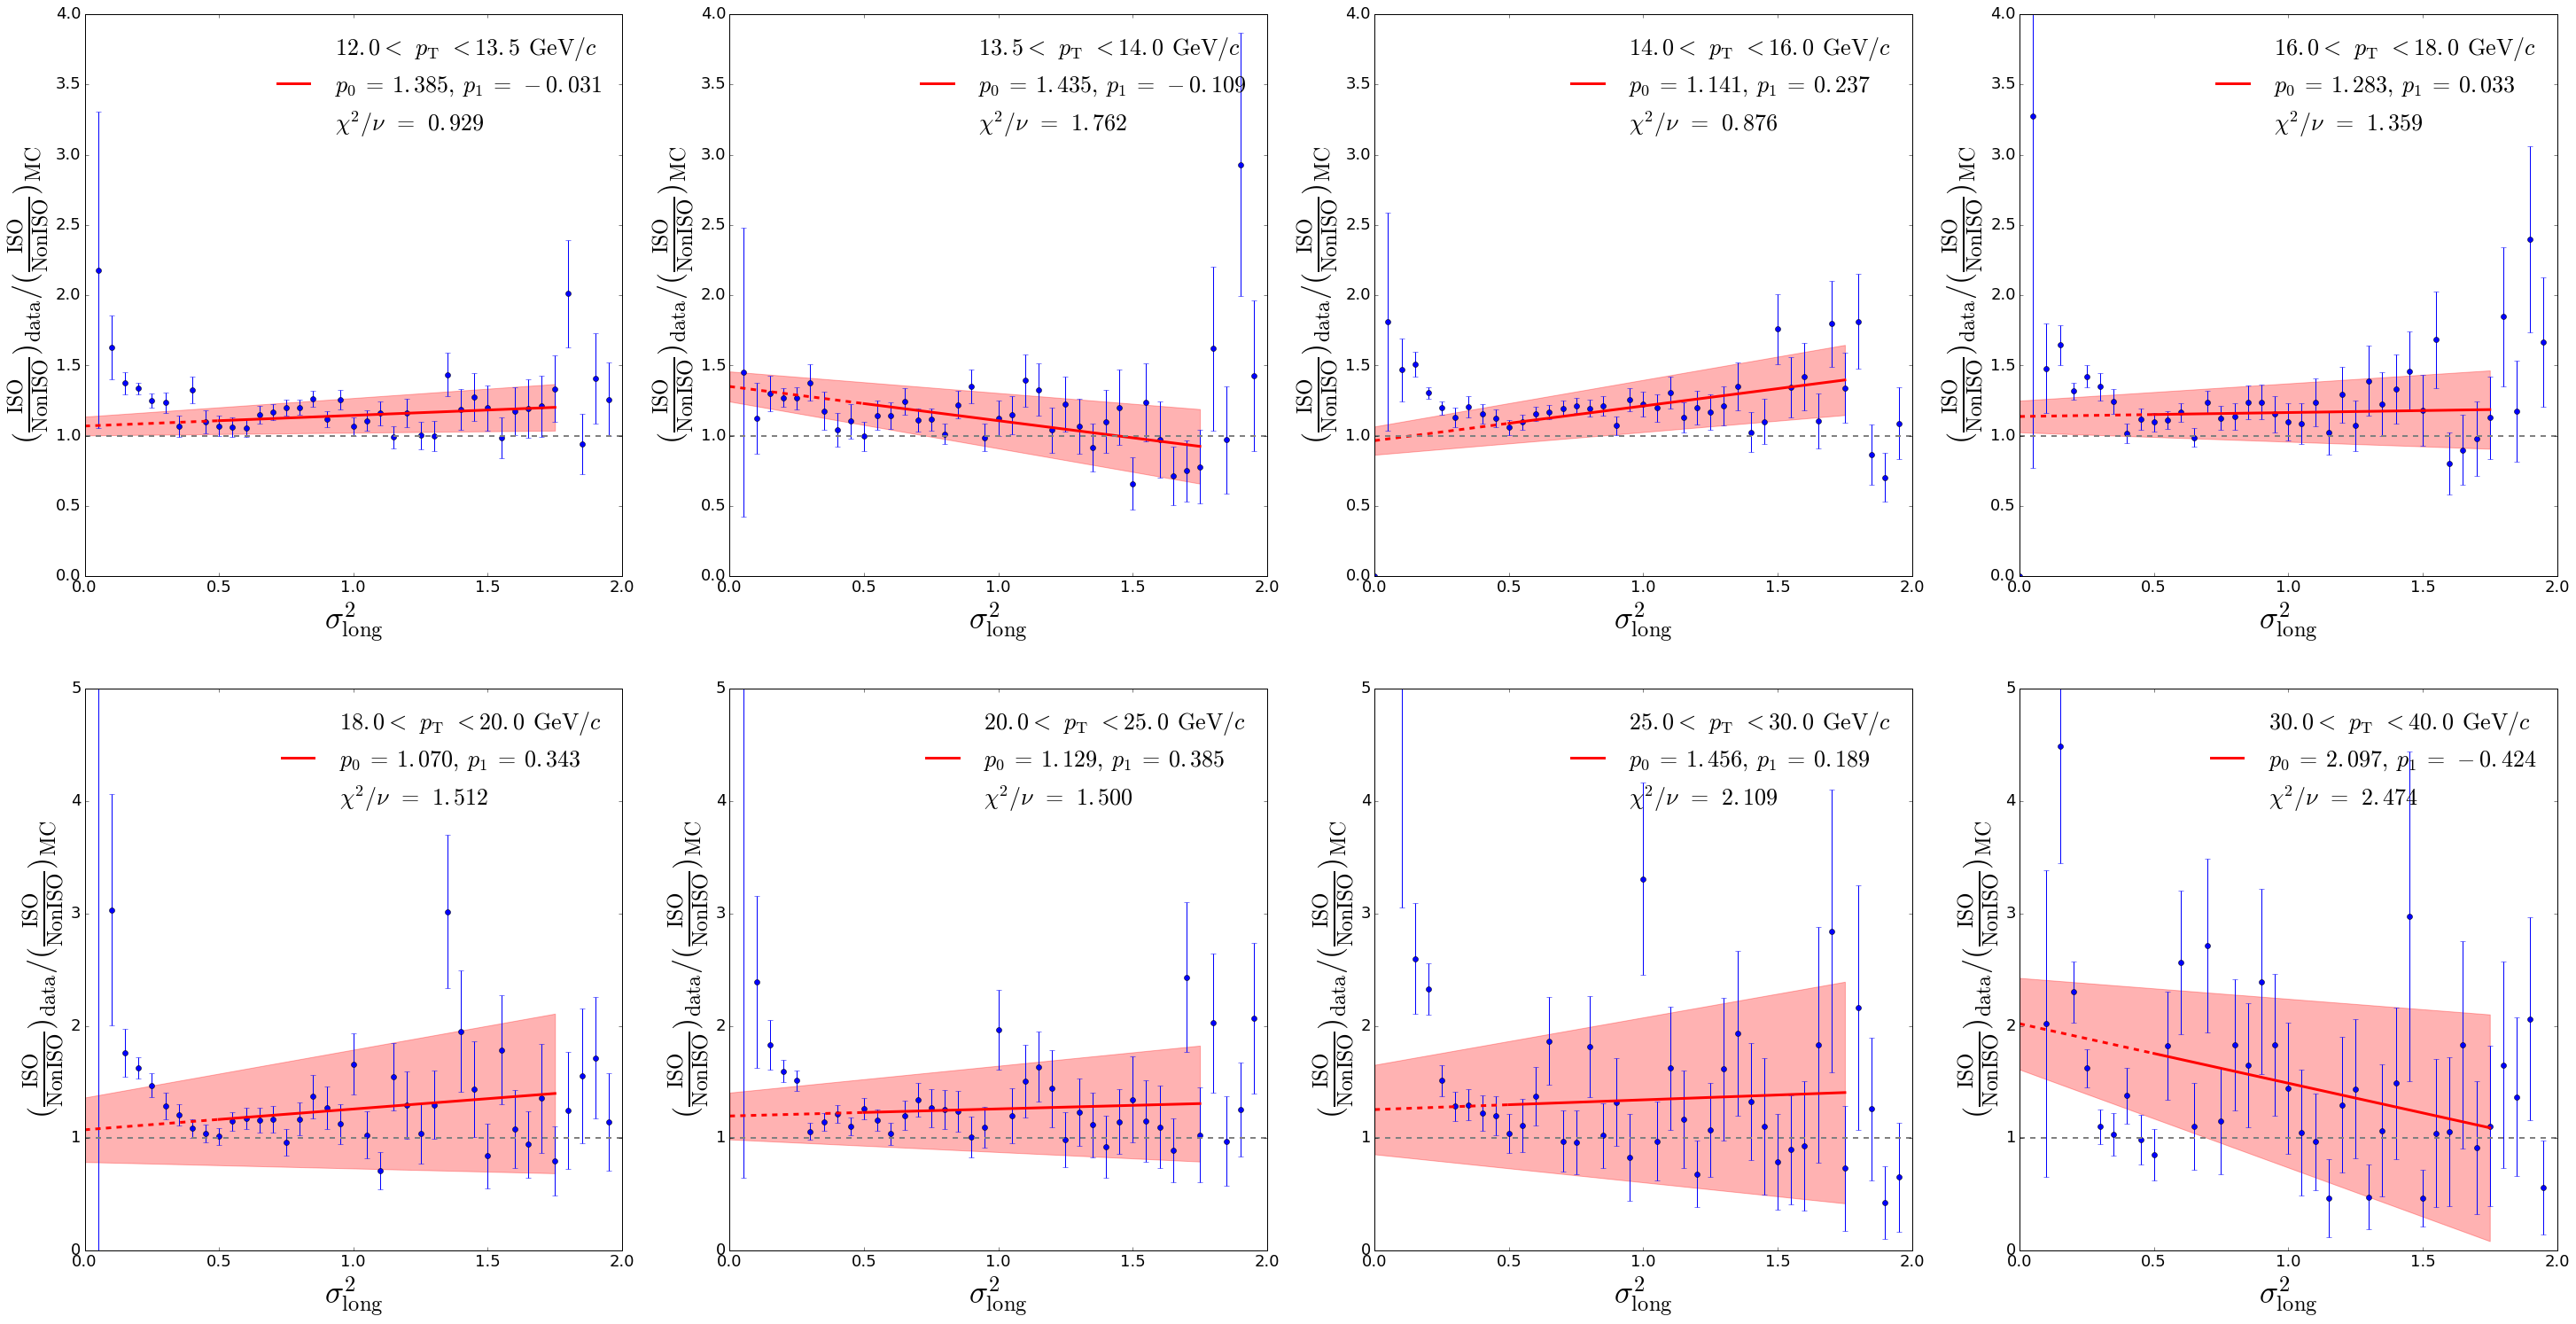

In [23]:
fig = plt.figure(figsize=(50,25))

plt.subplot(2,4,1)
plt.errorbar(j_1[0:40], pPb_ratio_dataToMC_1, yerr=pPb_ratio_dataToMC_err_1, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 12.0 < \:\: p_{\mathrm{T}} \:\: < 13.5 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 1.385,\: p_{1} \: = \: -0.031$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 0.929 $')
plt.plot(j_1[10:36], popt_1[0] * (j_1[10:36]) + popt_1[1], 'r', linewidth = 3)
plt.plot(j_1[0:11], popt_1[0] * (j_1[0:11]) + popt_1[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_1[0:36], (popt_1[0] + perr_1[0]) * (j_1[0:36]) + (popt_1[1] + perr_1[1]), (popt_1[0] - perr_1[0]) * (j_1[0:36]) + (popt_1[1] - perr_1[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,4)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,2)
plt.errorbar(j_2[0:40], pPb_ratio_dataToMC_2, yerr=pPb_ratio_dataToMC_err_2, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 13.5 < \:\: p_{\mathrm{T}} \:\: < 14.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 1.435,\: p_{1} \: = \: -0.109$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 1.762$')
plt.plot(j_2[10:36], popt_2[0] * (j_2[10:36]) + popt_2[1], 'r', linewidth = 3)
plt.plot(j_1[0:11], popt_2[0] * (j_2[0:11]) + popt_2[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_2[0:36], (popt_2[0] + perr_2[0]) * (j_2[0:36]) + (popt_2[1] + perr_2[1]), (popt_2[0] - perr_2[0]) * (j_2[0:36]) + (popt_2[1] - perr_2[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,4)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,3)
plt.errorbar(j_3[0:40], pPb_ratio_dataToMC_3, yerr=pPb_ratio_dataToMC_err_3, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 14.0 < \:\: p_{\mathrm{T}} \:\: < 16.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 1.141,\: p_{1} \: = \: 0.237$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 0.876$')
plt.plot(j_3[10:36], popt_3[0] * (j_3[10:36]) + popt_3[1], 'r', linewidth = 3)
plt.plot(j_3[0:11], popt_3[0] * (j_3[0:11]) + popt_3[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_3[0:36], (popt_3[0] + perr_3[0]) * (j_3[0:36]) + (popt_3[1] + perr_3[1]), (popt_3[0] - perr_3[0]) * (j_3[0:36]) + (popt_3[1] - perr_3[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,4)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,4)
plt.errorbar(j_4[0:40], pPb_ratio_dataToMC_4, yerr=pPb_ratio_dataToMC_err_4, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 16.0 < \:\: p_{\mathrm{T}} \:\: < 18.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 1.283,\: p_{1} \: = \: 0.033$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 1.359$')
plt.plot(j_4[10:36], popt_4[0] * (j_4[10:36]) + popt_4[1], 'r', linewidth = 3)
plt.plot(j_4[0:11], popt_4[0] * (j_4[0:11]) + popt_4[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_4[0:36], (popt_4[0] + perr_4[0]) * (j_1[0:36]) + (popt_4[1] + perr_4[1]), (popt_4[0] - perr_4[0]) * (j_4[0:36]) + (popt_4[1] - perr_4[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,4)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,5)
plt.errorbar(j_5[0:40], pPb_ratio_dataToMC_5, yerr=pPb_ratio_dataToMC_err_5, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 18.0 < \:\: p_{\mathrm{T}} \:\: < 20.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 1.070,\: p_{1} \: = \: 0.343$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 1.512$')
plt.plot(j_5[10:36], popt_5[0] * (j_5[10:36]) + popt_5[1], 'r', linewidth = 3)
plt.plot(j_5[0:11], popt_5[0] * (j_5[0:11]) + popt_5[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_5[0:36], (popt_5[0] + perr_5[0]) * (j_5[0:36]) + (popt_5[1] + perr_5[1]), (popt_5[0] - perr_5[0]) * (j_5[0:36]) + (popt_5[1] - perr_5[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,6)
plt.errorbar(j_6[0:40], pPb_ratio_dataToMC_6, yerr=pPb_ratio_dataToMC_err_6, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 20.0 < \:\: p_{\mathrm{T}} \:\: < 25.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 1.129,\: p_{1} \: = \: 0.385$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 1.500$')
plt.plot(j_6[10:36], popt_6[0] * (j_6[10:36]) + popt_6[1], 'r', linewidth = 3)
plt.plot(j_6[0:11], popt_6[0] * (j_6[0:11]) + popt_6[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_6[0:36], (popt_6[0] + perr_6[0]) * (j_6[0:36]) + (popt_6[1] + perr_6[1]), (popt_6[0] - perr_6[0]) * (j_6[0:36]) + (popt_6[1] - perr_6[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,7)
plt.errorbar(j_7[0:40], pPb_ratio_dataToMC_7, yerr=pPb_ratio_dataToMC_err_7, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 25.0 < \:\: p_{\mathrm{T}} \:\: < 30.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 1.456,\: p_{1} \: = \: 0.189$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 2.109$')
plt.plot(j_7[10:36], popt_7[0] * (j_7[10:36]) + popt_7[1], 'r', linewidth = 3)
plt.plot(j_7[0:11], popt_7[0] * (j_7[0:11]) + popt_7[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_7[0:36], (popt_7[0] + perr_7[0]) * (j_7[0:36]) + (popt_7[1] + perr_7[1]), (popt_7[0] - perr_7[0]) * (j_7[0:36]) + (popt_7[1] - perr_7[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,8)
plt.errorbar(j_8[0:40], pPb_ratio_dataToMC_8, yerr=pPb_ratio_dataToMC_err_8, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 30.0 < \:\: p_{\mathrm{T}} \:\: < 40.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: 2.097,\: p_{1} \: = \: -0.424$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\: 2.474$')
plt.plot(j_8[10:36], popt_8[0] * (j_8[10:36]) + popt_8[1], 'r', linewidth = 3)
plt.plot(j_8[0:11], popt_8[0] * (j_8[0:11]) + popt_8[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_8[0:36], (popt_8[0] + perr_8[0]) * (j_8[0:36]) + (popt_8[1] + perr_8[1]), (popt_8[0] - perr_8[0]) * (j_8[0:36]) + (popt_8[1] - perr_8[1]), color='red', alpha='0.3')

plt.xlabel(r'$\sigma^{2}_{\mathrm{long}}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

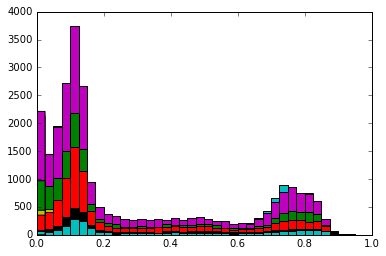

In [24]:
#####For Lambda variables#####

i_1_D, j_1_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_1["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_1['weights'])
k_1_D, l_1_D, _ = plt.hist(pPbHists_04_1_1["cluster_NN1"],bins=40,range=(0,1))

m_1_D, n_1_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_1["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_1['weights'])
o_1_D, p_1_D, _ = plt.hist(pPbHists_04_5_15_1["cluster_NN1"],bins=40,range=(0,1))

##############################

i_2_D, j_2_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_2["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_2['weights'])
k_2_D, l_2_D, _ = plt.hist(pPbHists_04_1_2["cluster_NN1"],bins=40,range=(0,1))

m_2_D, n_2_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_2["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_2['weights'])
o_2_D, p_2_D, _ = plt.hist(pPbHists_04_5_15_2["cluster_NN1"],bins=40,range=(0,1))

##############################

i_3_D, j_3_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_3["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_3['weights'])
k_3_D, l_3_D, _ = plt.hist(pPbHists_04_1_3["cluster_NN1"],bins=40,range=(0,1))

m_3_D, n_3_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_3["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_3['weights'])
o_3_D, p_3_D, _ = plt.hist(pPbHists_04_5_15_3["cluster_NN1"],bins=40,range=(0,1))

##############################

i_4_D, j_4_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_4["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_4['weights'])
k_4_D, l_4_D, _ = plt.hist(pPbHists_04_1_4["cluster_NN1"],bins=40,range=(0,1))

m_4_D, n_4_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_4["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_4['weights'])
o_4_D, p_4_D, _ = plt.hist(pPbHists_04_5_15_4["cluster_NN1"],bins=40,range=(0,1))

##############################

i_5_D, j_5_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_5["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_5['weights'])
k_5_D, l_5_D, _ = plt.hist(pPbHists_04_1_5["cluster_NN1"],bins=40,range=(0,1))

m_5_D, n_5_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_5["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_5['weights'])
o_5_D, p_5_D, _ = plt.hist(pPbHists_04_5_15_5["cluster_NN1"],bins=40,range=(0,1))

##############################

i_6_D, j_6_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_6["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_6['weights'])
k_6_D, l_6_D, _ = plt.hist(pPbHists_04_1_6["cluster_NN1"],bins=40,range=(0,1))

m_6_D, n_6_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_6["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_6['weights'])
o_6_D, p_6_D, _ = plt.hist(pPbHists_04_5_15_6["cluster_NN1"],bins=40,range=(0,1))

##############################

i_7_D, j_7_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_7["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_7['weights'])
k_7_D, l_7_D, _ = plt.hist(pPbHists_04_1_7["cluster_NN1"],bins=40,range=(0,1))

m_7_D, n_7_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_7["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_7['weights'])
o_7_D, p_7_D, _ = plt.hist(pPbHists_04_5_15_7["cluster_NN1"],bins=40,range=(0,1))

##############################

i_8_D, j_8_D, _ = plt.hist(mcSignal_18g7a_Hists_04_1_8["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_1_8['weights'])
k_8_D, l_8_D, _ = plt.hist(pPbHists_04_1_8["cluster_NN1"],bins=40,range=(0,1))

m_8_D, n_8_D, _ = plt.hist(mcSignal_18g7a_Hists_04_5_15_8["cluster_NN1"],bins=40,range=(0,1),weights=mcSignal_18g7a_Hists_04_5_15_8['weights'])
o_8_D, p_8_D, _ = plt.hist(pPbHists_04_5_15_8["cluster_NN1"],bins=40,range=(0,1))

In [25]:
pPb_ratio_data_1_D = np.divide(k_1_D,o_1_D)
pPb_ratio_MC_1_D   = np.divide(i_1_D,m_1_D)

pPb_ratio_dataToMC_1_D = np.divide(pPb_ratio_data_1_D,pPb_ratio_MC_1_D)

##############################

pPb_ratio_data_2_D = np.divide(k_2_D,o_2_D)
pPb_ratio_MC_2_D   = np.divide(i_2_D,m_2_D)

pPb_ratio_dataToMC_2_D = np.divide(pPb_ratio_data_2_D,pPb_ratio_MC_2_D)

##############################

pPb_ratio_data_3_D = np.divide(k_3_D,o_3_D)
pPb_ratio_MC_3_D   = np.divide(i_3_D,m_3_D)

pPb_ratio_dataToMC_3_D = np.divide(pPb_ratio_data_3_D,pPb_ratio_MC_3_D)

##############################

pPb_ratio_data_4_D = np.divide(k_4_D,o_4_D)
pPb_ratio_MC_4_D   = np.divide(i_4_D,m_4_D)

pPb_ratio_dataToMC_4_D = np.divide(pPb_ratio_data_4_D,pPb_ratio_MC_4_D)

##############################

pPb_ratio_data_5_D = np.divide(k_5_D,o_5_D)
pPb_ratio_MC_5_D   = np.divide(i_5_D,m_5_D)

pPb_ratio_dataToMC_5_D = np.divide(pPb_ratio_data_5_D,pPb_ratio_MC_5_D)

##############################

pPb_ratio_data_6_D = np.divide(k_6_D,o_6_D)
pPb_ratio_MC_6_D   = np.divide(i_6_D,m_6_D)

pPb_ratio_dataToMC_6_D = np.divide(pPb_ratio_data_6_D,pPb_ratio_MC_6_D)

##############################

pPb_ratio_data_7_D = np.divide(k_7_D,o_7_D)
pPb_ratio_MC_7_D   = np.divide(i_7_D,m_7_D)

pPb_ratio_dataToMC_7_D = np.divide(pPb_ratio_data_7_D,pPb_ratio_MC_7_D)

##############################

pPb_ratio_data_8_D = np.divide(k_8_D,o_8_D)
pPb_ratio_MC_8_D   = np.divide(i_8_D,m_8_D)

pPb_ratio_dataToMC_8_D = np.divide(pPb_ratio_data_8_D,pPb_ratio_MC_8_D)

In [26]:
pPb_ratio_data_err_1_D = np.sqrt( (np.divide(1, np.sqrt(k_1_D)))**2 + (np.divide(1, np.sqrt(o_1_D)))**2 )

pPb_ratio_dataToMC_err_1_D = pPb_ratio_dataToMC_1_D * pPb_ratio_data_err_1_D

##############################

pPb_ratio_data_err_2_D = np.sqrt( (np.divide(1, np.sqrt(k_2_D)))**2 + (np.divide(1, np.sqrt(o_2_D)))**2 )

pPb_ratio_dataToMC_err_2_D = pPb_ratio_dataToMC_2_D * pPb_ratio_data_err_2_D

##############################

pPb_ratio_data_err_3_D = np.sqrt( (np.divide(1, np.sqrt(k_3_D)))**2 + (np.divide(1, np.sqrt(o_3_D)))**2 )

pPb_ratio_dataToMC_err_3_D = pPb_ratio_dataToMC_3_D * pPb_ratio_data_err_3_D

##############################

pPb_ratio_data_err_4_D = np.sqrt( (np.divide(1, np.sqrt(k_4_D)))**2 + (np.divide(1, np.sqrt(o_4_D)))**2 )

pPb_ratio_dataToMC_err_4_D = pPb_ratio_dataToMC_4_D * pPb_ratio_data_err_4_D

##############################

pPb_ratio_data_err_5_D = np.sqrt( (np.divide(1, np.sqrt(k_5_D)))**2 + (np.divide(1, np.sqrt(o_5_D)))**2 )

pPb_ratio_dataToMC_err_5_D = pPb_ratio_dataToMC_5_D * pPb_ratio_data_err_5_D

##############################

pPb_ratio_data_err_6_D = np.sqrt( (np.divide(1, np.sqrt(k_6_D)))**2 + (np.divide(1, np.sqrt(o_6_D)))**2 )

pPb_ratio_dataToMC_err_6_D = pPb_ratio_dataToMC_6_D * pPb_ratio_data_err_6_D

##############################

pPb_ratio_data_err_7_D = np.sqrt( (np.divide(1, np.sqrt(k_7_D)))**2 + (np.divide(1, np.sqrt(o_7_D)))**2 )

pPb_ratio_dataToMC_err_7_D = pPb_ratio_dataToMC_7_D * pPb_ratio_data_err_7_D

##############################

pPb_ratio_data_err_8_D = np.sqrt( (np.divide(1, np.sqrt(k_8_D)))**2 + (np.divide(1, np.sqrt(o_8_D)))**2 )

pPb_ratio_dataToMC_err_8_D = pPb_ratio_dataToMC_8_D * pPb_ratio_data_err_8_D

In [27]:
popt_1_D,pcov_1_D = curve_fit(func, j_1_D[0:21], pPb_ratio_dataToMC_1_D[0:21])

popt_2_D,pcov_2_D = curve_fit(func, j_2_D[0:21], pPb_ratio_dataToMC_2_D[0:21])

popt_3_D,pcov_3_D = curve_fit(func, j_3_D[0:21], pPb_ratio_dataToMC_3_D[0:21])

popt_4_D,pcov_4_D = curve_fit(func, j_4_D[0:21], pPb_ratio_dataToMC_4_D[0:21])

popt_5_D,pcov_5_D = curve_fit(func, j_5_D[0:21], pPb_ratio_dataToMC_5_D[0:21])

popt_6_D,pcov_6_D = curve_fit(func, j_6_D[0:21], pPb_ratio_dataToMC_6_D[0:21])

popt_7_D,pcov_7_D = curve_fit(func, j_7_D[0:21], pPb_ratio_dataToMC_7_D[0:21])

popt_8_D,pcov_8_D = curve_fit(func, j_8_D[0:21], pPb_ratio_dataToMC_8_D[0:21])

In [28]:
perr_1_D = np.sqrt(np.diag(pcov_1_D))

perr_2_D = np.sqrt(np.diag(pcov_2_D))

perr_3_D = np.sqrt(np.diag(pcov_3_D))

perr_4_D = np.sqrt(np.diag(pcov_4_D))

perr_5_D = np.sqrt(np.diag(pcov_5_D))

perr_6_D = np.sqrt(np.diag(pcov_6_D))

perr_7_D = np.sqrt(np.diag(pcov_7_D))

perr_8_D = np.sqrt(np.diag(pcov_8_D))

In [29]:
chi_2_bin_1_D = np.divide(pPb_ratio_dataToMC_1_D[0:21] - (popt_1_D[0] * (j_1_D[0:21]) + popt_1_D[1]), pPb_ratio_dataToMC_err_1_D[0:21])
chi_2_1_D = np.sum(chi_2_bin_1_D**2)
red_chi_2_1_D = chi_2_1_D / (pPb_ratio_dataToMC_1_D[0:21].shape[0] - 2)

##############################

chi_2_bin_2_D = np.divide(pPb_ratio_dataToMC_2_D[0:21] - (popt_2_D[0] * (j_2_D[0:21]) + popt_2_D[1]), pPb_ratio_dataToMC_err_2_D[0:21])
chi_2_2_D = np.sum(chi_2_bin_2_D**2)
red_chi_2_2_D = chi_2_2_D / (pPb_ratio_dataToMC_2_D[0:21].shape[0] - 2)

##############################

chi_2_bin_3_D = np.divide(pPb_ratio_dataToMC_3_D[0:21] - (popt_3_D[0] * (j_3_D[0:21]) + popt_3_D[1]), pPb_ratio_dataToMC_err_3_D[0:21])
chi_2_3_D = np.sum(chi_2_bin_3_D**2)
red_chi_2_3_D = chi_2_3_D / (pPb_ratio_dataToMC_3_D[0:21].shape[0] - 2)

##############################

chi_2_bin_4_D = np.divide(pPb_ratio_dataToMC_4_D[0:21] - (popt_4_D[0] * (j_4_D[0:21]) + popt_4_D[1]), pPb_ratio_dataToMC_err_4_D[0:21])
chi_2_4_D = np.sum(chi_2_bin_4_D**2)
red_chi_2_4_D = chi_2_4_D / (pPb_ratio_dataToMC_4_D[0:21].shape[0] - 2)

##############################

chi_2_bin_5_D = np.divide(pPb_ratio_dataToMC_5_D[0:21] - (popt_5_D[0] * (j_5_D[0:21]) + popt_5_D[1]), pPb_ratio_dataToMC_err_5_D[0:21])
chi_2_5_D = np.sum(chi_2_bin_5_D**2)
red_chi_2_5_D = chi_2_5_D / (pPb_ratio_dataToMC_5_D[0:21].shape[0] - 2)

##############################

chi_2_bin_6_D = np.divide(pPb_ratio_dataToMC_6_D[0:21] - (popt_6_D[0] * (j_6_D[0:21]) + popt_6_D[1]), pPb_ratio_dataToMC_err_6_D[0:21])
chi_2_6_D = np.sum(chi_2_bin_6_D**2)
red_chi_2_6_D = chi_2_6_D / (pPb_ratio_dataToMC_6_D[0:21].shape[0] - 2)

##############################

chi_2_bin_7_D = np.divide(pPb_ratio_dataToMC_7_D[0:21] - (popt_7_D[0] * (j_7_D[0:21]) + popt_7_D[1]), pPb_ratio_dataToMC_err_7_D[0:21])
chi_2_7_D = np.sum(chi_2_bin_7_D**2)
red_chi_2_7_D = chi_2_7_D / (pPb_ratio_dataToMC_7_D[0:21].shape[0] - 2)

##############################

chi_2_bin_8_D = np.divide(pPb_ratio_dataToMC_8_D[0:21] - (popt_8_D[0] * (j_8_D[0:21]) + popt_8_D[1]), pPb_ratio_dataToMC_err_8_D[0:21])
chi_2_8_D = np.sum(chi_2_bin_8_D**2)
red_chi_2_8_D = chi_2_8_D / (pPb_ratio_dataToMC_8_D[0:21].shape[0] - 2)

In [30]:
slope_D = np.array([str(round(popt_1_D[0],3)),str(round(popt_2_D[0],3)),str(round(popt_3_D[0],3)),str(round(popt_4_D[0],3)),str(round(popt_5_D[0],3)),str(round(popt_6_D[0],3)),str(round(popt_7_D[0],3)),str(round(popt_8_D[0],3))])
int_D   = np.array([str(round(popt_1_D[1],3)),str(round(popt_2_D[1],3)),str(round(popt_3_D[1],3)),str(round(popt_4_D[1],3)),str(round(popt_5_D[1],3)),str(round(popt_6_D[1],3)),str(round(popt_7_D[1],3)),str(round(popt_8_D[1],3))])
chi_D   = np.array([str(round(red_chi_2_1_D,4)),str(round(red_chi_2_2_D,4)),str(round(red_chi_2_3_D,4)),str(round(red_chi_2_4_D,4)),str(round(red_chi_2_5_D,4)),str(round(red_chi_2_6_D,4)),str(round(red_chi_2_7_D,4)),str(round(red_chi_2_8_D,4))])

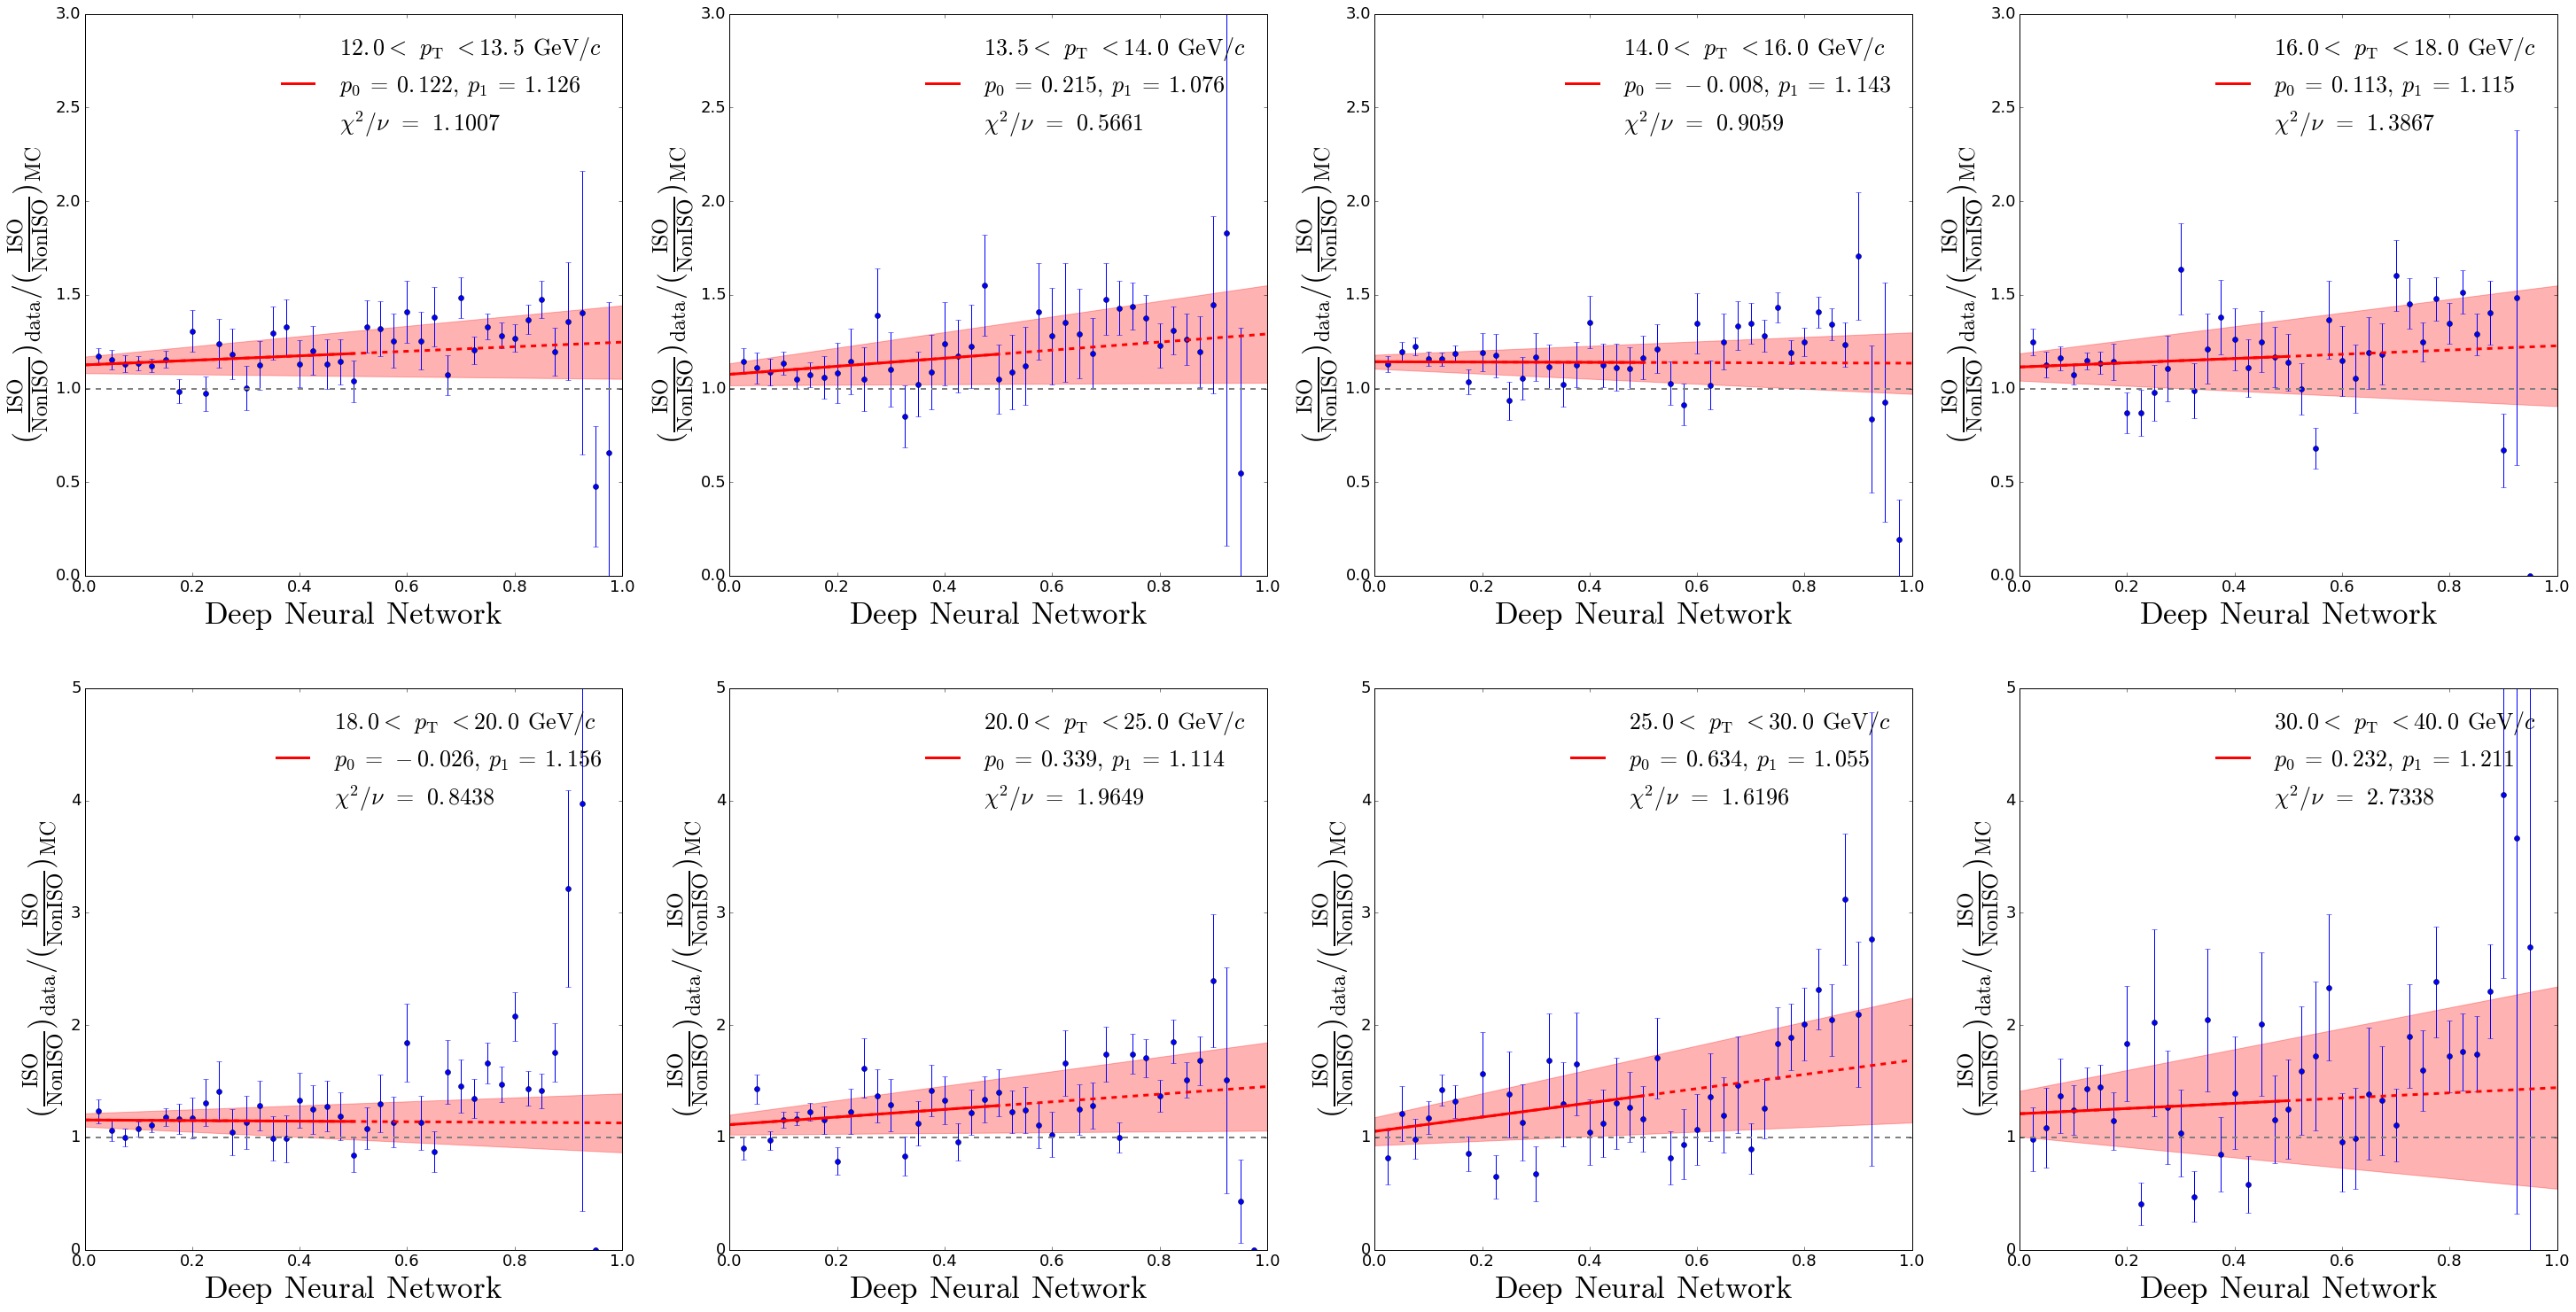

In [31]:
fig = plt.figure(figsize=(50,25))

plt.subplot(2,4,1)
plt.errorbar(j_1_D[0:40] + 0.025, pPb_ratio_dataToMC_1_D, yerr=pPb_ratio_dataToMC_err_1_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 12.0 < \:\: p_{\mathrm{T}} \:\: < 13.5 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \:' + slope_D[0] + ',\: p_{1} \: = \:'+ int_D[0] + '$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:'+ chi_D[0] +' $')
plt.plot(j_1_D[0:21], popt_1_D[0] * (j_1_D[0:21]) + popt_1_D[1], 'r', linewidth = 3)
plt.plot(j_1_D[0:41], popt_1_D[0] * (j_1_D[0:41]) + popt_1_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_1_D[0:41], (popt_1_D[0] + perr_1_D[0]) * (j_1_D[0:41]) + (popt_1_D[1] + perr_1_D[1]), (popt_1_D[0] - perr_1_D[0]) * (j_1_D[0:41]) + (popt_1_D[1] - perr_1_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,3)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,2)
plt.errorbar(j_2_D[0:40] + 0.025, pPb_ratio_dataToMC_2_D, yerr=pPb_ratio_dataToMC_err_2_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 13.5 < \:\: p_{\mathrm{T}} \:\: < 14.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \:'  + slope_D[1] + ',\: p_{1} \: = \:'+ int_D[1] +'$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:' + chi_D[1] +'$')
plt.plot(j_2_D[0:21], popt_2_D[0] * (j_2_D[0:21]) + popt_2_D[1], 'r', linewidth = 3)
plt.plot(j_2_D[0:41], popt_2_D[0] * (j_2_D[0:41]) + popt_2_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_2_D[0:41], (popt_2_D[0] + perr_2_D[0]) * (j_2_D[0:41]) + (popt_2_D[1] + perr_2_D[1]), (popt_2_D[0] - perr_2_D[0]) * (j_2_D[0:41]) + (popt_2_D[1] - perr_2_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,3)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,3)
plt.errorbar(j_3_D[0:40] + 0.025, pPb_ratio_dataToMC_3_D, yerr=pPb_ratio_dataToMC_err_3_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 14.0 < \:\: p_{\mathrm{T}} \:\: < 16.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \:'  + slope_D[2] + ',\: p_{1} \: = \:' + int_D[2] +'$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:'+ chi_D[2] +'$')
plt.plot(j_3_D[0:21], popt_3_D[0] * (j_3_D[0:21]) + popt_3_D[1], 'r', linewidth = 3)
plt.plot(j_3_D[0:41], popt_3_D[0] * (j_3_D[0:41]) + popt_3_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_3_D[0:41], (popt_3_D[0] + perr_3_D[0]) * (j_3_D[0:41]) + (popt_3_D[1] + perr_3_D[1]), (popt_3_D[0] - perr_3_D[0]) * (j_3_D[0:41]) + (popt_3_D[1] - perr_3_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,3)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,4)
plt.errorbar(j_4_D[0:40] + 0.025, pPb_ratio_dataToMC_4_D, yerr=pPb_ratio_dataToMC_err_4_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 16.0 < \:\: p_{\mathrm{T}} \:\: < 18.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \: '  + slope_D[3] + ',\: p_{1} \: = \:'+ int_D[3] +'$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:' + chi_D[3] +' $')
plt.plot(j_4_D[0:21], popt_4_D[0] * (j_4_D[0:21]) + popt_4_D[1], 'r', linewidth = 3)
plt.plot(j_4_D[0:41], popt_4_D[0] * (j_4_D[0:41]) + popt_4_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_4_D[0:41], (popt_4_D[0] + perr_4_D[0]) * (j_4_D[0:41]) + (popt_4_D[1] + perr_4_D[1]), (popt_4_D[0] - perr_4_D[0]) * (j_4_D[0:41]) + (popt_4_D[1] - perr_4_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,3)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,5)
plt.errorbar(j_5_D[0:40] + 0.025, pPb_ratio_dataToMC_5_D, yerr=pPb_ratio_dataToMC_err_5_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 18.0 < \:\: p_{\mathrm{T}} \:\: < 20.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \:'  + slope_D[4] +',\: p_{1} \: = \:' + int_D[4] + '$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:'+ chi_D[4] +' $')
plt.plot(j_5_D[0:21], popt_5_D[0] * (j_5_D[0:21]) + popt_5_D[1], 'r', linewidth = 3)
plt.plot(j_5_D[0:41], popt_5_D[0] * (j_5_D[0:41]) + popt_5_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_5_D[0:41], (popt_5_D[0] + perr_5_D[0]) * (j_5_D[0:41]) + (popt_5_D[1] + perr_5_D[1]), (popt_5_D[0] - perr_5_D[0]) * (j_5_D[0:41]) + (popt_5_D[1] - perr_5_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,6)
plt.errorbar(j_6_D[0:40] + 0.025, pPb_ratio_dataToMC_6_D, yerr=pPb_ratio_dataToMC_err_6_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 20.0 < \:\: p_{\mathrm{T}} \:\: < 25.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \:'  + slope_D[5] +',\: p_{1} \: = \:' + int_D[5] + '$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:'+ chi_D[5] +' $')
plt.plot(j_6_D[0:21], popt_6_D[0] * (j_6_D[0:21]) + popt_6_D[1], 'r', linewidth = 3)
plt.plot(j_6_D[0:41], popt_6_D[0] * (j_6_D[0:41]) + popt_6_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_6_D[0:41], (popt_6_D[0] + perr_6_D[0]) * (j_6_D[0:41]) + (popt_6_D[1] + perr_6_D[1]), (popt_6_D[0] - perr_6_D[0]) * (j_6_D[0:41]) + (popt_6_D[1] - perr_6_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,7)
plt.errorbar(j_7_D[0:40] + 0.025, pPb_ratio_dataToMC_7_D, yerr=pPb_ratio_dataToMC_err_7_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 25.0 < \:\: p_{\mathrm{T}} \:\: < 30.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \:'  + slope_D[6] + ',\: p_{1} \: = \:' + int_D[6] +'$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:' + chi_D[6] +'$')
plt.plot(j_7_D[0:21], popt_7_D[0] * (j_7_D[0:21]) + popt_7_D[1], 'r', linewidth = 3)
plt.plot(j_7_D[0:41], popt_7_D[0] * (j_7_D[0:41]) + popt_7_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_7_D[0:41], (popt_7_D[0] + perr_7_D[0]) * (j_7_D[0:41]) + (popt_7_D[1] + perr_7_D[1]), (popt_7_D[0] - perr_7_D[0]) * (j_7_D[0:41]) + (popt_7_D[1] - perr_7_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})

plt.subplot(2,4,8)
plt.errorbar(j_8_D[0:40] + 0.025, pPb_ratio_dataToMC_8_D, yerr=pPb_ratio_dataToMC_err_8_D, fmt='o')
plt.plot([],[], '',color = 'white',label=r'$ 30.0 < \:\: p_{\mathrm{T}} \:\: < 40.0 \:\: \mathrm{GeV} / c$')
plt.plot([],[], '',color = 'red',label=r'$p_{0} \: = \:'  + slope_D[7] + ',\: p_{1} \: = \:' + int_D[7] + '$',linewidth = 3)
plt.plot([],[], '',color = 'white',label=r'$\chi^2 / \nu \:\: = \:\:' + chi_D[7] +' $')
plt.plot(j_8_D[0:21], popt_8_D[0] * (j_8_D[0:21]) + popt_8_D[1], 'r', linewidth = 3)
plt.plot(j_8_D[0:41], popt_8_D[0] * (j_8_D[0:41]) + popt_8_D[1], 'r', linestyle= '--', linewidth = 3)

plt.fill_between(j_8_D[0:41], (popt_8_D[0] + perr_8_D[0]) * (j_8_D[0:41]) + (popt_8_D[1] + perr_8_D[1]), (popt_8_D[0] - perr_8_D[0]) * (j_8_D[0:41]) + (popt_8_D[1] - perr_8_D[1]), color='red', alpha='0.3')

plt.xlabel(r'$\mathrm{Deep \:\: Neural \:\: Network}$', fontsize = 35)
plt.xticks(fontsize = 18)
plt.ylabel(r'$(\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{data}} / (\frac{\mathrm{ISO}}{\mathrm{NonISO}})_{\mathrm{MC}}$', fontsize = 34)
plt.yticks(fontsize =18)
plt.ylim(0,5)

plt.axhline(y=1.0, color='gray', linestyle='--', linewidth = 2)
plt.legend(loc='upper right', frameon=False, prop={'size':26})